In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/data_2024_3.csv', encoding='euc-kr')

# Shuffle the data
data = data.sample(frac=1).reset_index(drop=True)

print(data.head())
# Define split ratios
train_ratio = 0.7
validation_ratio = 0.15
test_ratio = 0.15

# Split the data into training, validation, and testing sets
train_data, temp_data = train_test_split(data, test_size=(1 - train_ratio))
val_data, test_data = train_test_split(temp_data, test_size=test_ratio/(test_ratio + validation_ratio))

# Save the splits to CSV files if needed
train_data.to_csv("train_data.csv", index=False)
val_data.to_csv("val_data.csv", index=False)
test_data.to_csv("test_data.csv", index=False)

      관측지점              관측시간  관측온도  관측습도    관측기압  관측풍속   관측풍향  관측최대풍속  관측미세먼지  \
0   춘천_주거2  2024-03-08 16:00   7.0  23.4  1005.3   1.9  319.6     5.1    15.5   
1    인천_해안  2024-03-05 15:00  11.0  42.2  1013.2   0.4   12.9     1.5    75.2   
2   평창_30m  2024-03-26 06:20  -1.7  96.8   903.8   5.3   13.6     NaN     0.0   
3  양재_200m  2024-03-26 15:20  11.9  55.9  1018.1   0.8   45.5     2.2     5.0   
4    기장_산단  2024-03-19 14:40  16.3  34.3  1006.8   2.1  248.3     NaN    17.6   

   관측초미세먼지  ...  (AVOC)배관관측온도  (BVOC)관측온도  (BVOC)관측습도  (BVOC)관측기압  (BVOC)관측풍속  \
0     11.8  ...         104.6         6.9        23.3      1005.3         2.1   
1     35.2  ...         106.2        11.0        42.1      1013.2         0.6   
2      0.0  ...         107.5        -1.7        96.4       903.8         6.0   
3      4.3  ...         105.6        11.6        55.9      1018.1         0.7   
4     10.1  ...         107.9        16.1        34.7      1006.7         2.1   

   (BVOC)관측풍향  (BVOC)관측최대풍

In [4]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler

# 데이터 불러오기 (전처리 완료된 데이터라고 가정)
data_train = pd.read_csv('train_data.csv')
data_test = pd.read_csv('test_data.csv')

# 특성과 타겟 변수 분리
target_var = "관측미세먼지"
string_column = ["관측미세먼지", "관측지점", "관측시간"]

X_train = data_train.drop(columns=[target_var]).values
y_train = data_train[target_var].values

X_test = data_test.drop(columns=[target_var]).values
y_test = data_test[target_var].values

# 각각 train과 test를 알맞게 데이터와 매치, 관측 지점과 관측시간은 숫자형이 아니라서 일단 배제,추후 필요없는 특성이면 drop, 아니라면 다른 전처리 필요
X_train = train_data.drop(columns=["관측미세먼지", "관측지점", "관측시간"]).apply(pd.to_numeric, errors='coerce').fillna(0).values
X_test = test_data.drop(columns=["관측미세먼지", "관측지점", "관측시간"]).apply(pd.to_numeric, errors='coerce').fillna(0).values
y_train = train_data["관측미세먼지"].apply(pd.to_numeric, errors='coerce').fillna(0).values
y_test = test_data["관측미세먼지"].apply(pd.to_numeric, errors='coerce').fillna(0).values


# NaN 값 확인
print("NaN values in X_train:", np.isnan(X_train).sum())
print("NaN values in y_train:", np.isnan(y_train).sum())
print("NaN values in X_test:", np.isnan(X_test).sum())
print("NaN values in y_test:", np.isnan(y_test).sum())

NaN values in X_train: 0
NaN values in y_train: 0
NaN values in X_test: 0
NaN values in y_test: 0


In [7]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler

# 데이터 불러오기 (전처리 완료된 데이터라고 가정)
data_train = pd.read_csv('train_data.csv')
data_test = pd.read_csv('test_data.csv')

# 특성과 타겟 변수 분리
target_var = "관측미세먼지"
string_column = ["관측미세먼지", "관측지점", "관측시간"]

X_train = data_train.drop(columns=[target_var]).values
y_train = data_train[target_var].values

X_test = data_test.drop(columns=[target_var]).values
y_test = data_test[target_var].values

# 각각 train과 test를 알맞게 데이터와 매치, 관측 지점과 관측시간은 숫자형이 아니라서 일단 배제,추후 필요없는 특성이면 drop, 아니라면 다른 전처리 필요
X_train = train_data.drop(columns=["관측미세먼지", "관측지점", "관측시간"]).apply(pd.to_numeric, errors='coerce').fillna(0).values
X_test = test_data.drop(columns=["관측미세먼지", "관측지점", "관측시간"]).apply(pd.to_numeric, errors='coerce').fillna(0).values
y_train = train_data["관측미세먼지"].apply(pd.to_numeric, errors='coerce').fillna(0).values
y_test = test_data["관측미세먼지"].apply(pd.to_numeric, errors='coerce').fillna(0).values

# 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 데이터셋 축소, 시연에서는 10%만 사용
X_train, _, y_train, _ = train_test_split(X_train, y_train, train_size=0.1, random_state=42)
X_test, _, y_test, _ = train_test_split(X_test, y_test, train_size=0.1, random_state=42)

# Tensor로 변환
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)

X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# DataLoader 정의
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Transformer 모델 정의
class TransformerModel(nn.Module):
    def __init__(self, input_size, output_size, d_model=64, nhead=8, num_layers=3, dim_feedforward=256, dropout=0.1):
        super(TransformerModel, self).__init__()
        self.encoder = nn.Linear(input_size, d_model)
        self.pos_encoder = nn.Parameter(torch.zeros(1, d_model))
        encoder_layers = nn.TransformerEncoderLayer(d_model, nhead, dim_feedforward, dropout)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layers, num_layers)
        self.decoder = nn.Linear(d_model, output_size)

    def forward(self, src):
        src = self.encoder(src) + self.pos_encoder
        src = src.unsqueeze(1)  # (batch_size, seq_len=1, d_model)
        src = self.transformer_encoder(src)
        output = self.decoder(src[:, -1, :])
        return output

# 가중치 초기화 함수 정의
def init_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight)
        m.bias.data.fill_(0.01)
    elif isinstance(m, nn.TransformerEncoderLayer):
        for p in m.parameters():
            if p.dim() > 1:
                nn.init.xavier_uniform_(p)

# 모델 초기화
input_size = X_train.shape[1]
output_size = 1
model = TransformerModel(input_size, output_size).to(X_train.device)
model.apply(init_weights)

# 손실 함수 및 옵티마이저 정의
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)  # 학습률 조정

# 모델 학습
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * X_batch.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {epoch_loss:.4f}')

# 예측 함수 정의
def predict(model, X_test):
    model.eval()
    with torch.no_grad():
        y_pred = model(X_test)
    return y_pred.cpu().numpy()

# 예측 후 결과 저장
predicted_values = predict(model, X_test)

# 결과를 npy 값으로 저장, 다음 파일에서 사용 가능
np.save('Transformer.npy', predicted_values)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch [1/20], Loss: 957.9530
Epoch [2/20], Loss: 313.6024
Epoch [3/20], Loss: 185.0221
Epoch [4/20], Loss: 122.7693
Epoch [5/20], Loss: 88.3662
Epoch [6/20], Loss: 61.1913
Epoch [7/20], Loss: 64.3495
Epoch [8/20], Loss: 45.7944
Epoch [9/20], Loss: 34.5320
Epoch [10/20], Loss: 34.4229
Epoch [11/20], Loss: 34.8022
Epoch [12/20], Loss: 32.0558
Epoch [13/20], Loss: 30.9690
Epoch [14/20], Loss: 35.3637
Epoch [15/20], Loss: 23.2990
Epoch [16/20], Loss: 36.5635
Epoch [17/20], Loss: 26.0109
Epoch [18/20], Loss: 27.1857
Epoch [19/20], Loss: 29.7567
Epoch [20/20], Loss: 29.6579


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch [25/500], Train Loss: 45.6573, Test Loss: 9.3045
Epoch [50/500], Train Loss: 21.9244, Test Loss: 8.4427
Epoch [75/500], Train Loss: 15.2751, Test Loss: 4.1481
Epoch [100/500], Train Loss: 13.2394, Test Loss: 2.0209
Epoch [125/500], Train Loss: 5.9158, Test Loss: 2.9254
Epoch [150/500], Train Loss: 4.5409, Test Loss: 2.7475
Epoch [175/500], Train Loss: 3.7678, Test Loss: 4.6659
Epoch [200/500], Train Loss: 2.6671, Test Loss: 2.8890
Epoch [225/500], Train Loss: 3.8071, Test Loss: 2.1314
Epoch [250/500], Train Loss: 2.1568, Test Loss: 2.4068
Epoch [275/500], Train Loss: 3.5350, Test Loss: 2.2837
Epoch [300/500], Train Loss: 2.7583, Test Loss: 5.9986
Epoch [325/500], Train Loss: 1.9860, Test Loss: 2.5336
Epoch [350/500], Train Loss: 1.7350, Test Loss: 2.3192
Epoch [375/500], Train Loss: 1.3219, Test Loss: 1.6544
Epoch [400/500], Train Loss: 1.6760, Test Loss: 1.4545
Epoch [425/500], Train Loss: 0.9704, Test Loss: 2.2482
Epoch [450/500], Train Loss: 1.6635, Test Loss: 1.9766
Epoch [47

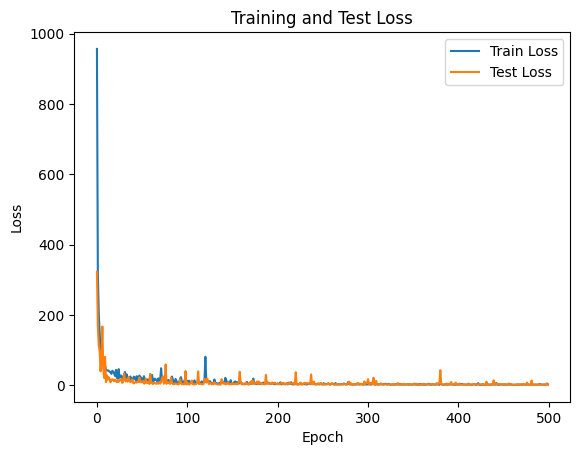

In [9]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 데이터 불러오기 (전처리 완료된 데이터라고 가정)
data_train = pd.read_csv('train_data.csv')
data_test = pd.read_csv('test_data.csv')

# 특성과 타겟 변수 분리
target_var = "관측미세먼지"
string_column = ["관측미세먼지", "관측지점", "관측시간"]

X_train = data_train.drop(columns=[target_var]).values
y_train = data_train[target_var].values

X_test = data_test.drop(columns=[target_var]).values
y_test = data_test[target_var].values

# 각각 train과 test를 알맞게 데이터와 매치, 관측 지점과 관측시간은 숫자형이 아니라서 일단 배제,추후 필요없는 특성이면 drop, 아니라면 다른 전처리 필요
X_train = train_data.drop(columns=["관측미세먼지", "관측지점", "관측시간"]).apply(pd.to_numeric, errors='coerce').fillna(0).values
X_test = test_data.drop(columns=["관측미세먼지", "관측지점", "관측시간"]).apply(pd.to_numeric, errors='coerce').fillna(0).values
y_train = train_data["관측미세먼지"].apply(pd.to_numeric, errors='coerce').fillna(0).values
y_test = test_data["관측미세먼지"].apply(pd.to_numeric, errors='coerce').fillna(0).values

# 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 데이터셋 축소, 시연에서는 10%만 사용
X_train, _, y_train, _ = train_test_split(X_train, y_train, train_size=0.1, random_state=42)
X_test, _, y_test, _ = train_test_split(X_test, y_test, train_size=0.1, random_state=42)

# Tensor로 변환
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)

X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# DataLoader 정의
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Transformer 모델 정의
class TransformerModel(nn.Module):
    def __init__(self, input_size, output_size, d_model=64, nhead=8, num_layers=3, dim_feedforward=256, dropout=0.1):
        super(TransformerModel, self).__init__()
        self.encoder = nn.Linear(input_size, d_model)
        self.pos_encoder = nn.Parameter(torch.zeros(1, d_model))
        encoder_layers = nn.TransformerEncoderLayer(d_model, nhead, dim_feedforward, dropout)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layers, num_layers)
        self.decoder = nn.Linear(d_model, output_size)

    def forward(self, src):
        src = self.encoder(src) + self.pos_encoder
        src = src.unsqueeze(1)  # (batch_size, seq_len=1, d_model)
        src = self.transformer_encoder(src)
        output = self.decoder(src[:, -1, :])
        return output

# 가중치 초기화 함수 정의
def init_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight)
        m.bias.data.fill_(0.01)
    elif isinstance(m, nn.TransformerEncoderLayer):
        for p in m.parameters():
            if p.dim() > 1:
                nn.init.xavier_uniform_(p)

# 모델 초기화
input_size = X_train.shape[1]
output_size = 1
model = TransformerModel(input_size, output_size).to(X_train.device)
model.apply(init_weights)

# 손실 함수 및 옵티마이저 정의
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)  # 학습률 조정

# Train 및 Test Loss 기록을 위한 리스트 선언
train_losses = []
test_losses = []

# 모델 학습
num_epochs = 500
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * X_batch.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)
    train_losses.append(epoch_loss)

    # Test 데이터로 Loss 계산
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test)
        test_loss = criterion(test_outputs, y_test)
        test_losses.append(test_loss.item())

    if (epoch + 1) % 25 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Train Loss: {epoch_loss:.4f}, Test Loss: {test_loss.item():.4f}')

# 예측 함수 정의
def predict(model, X_test):
    model.eval()
    with torch.no_grad():
        y_pred = model(X_test)
    return y_pred.cpu().numpy()

# Loss 그래프 그리기
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()
plt.show()

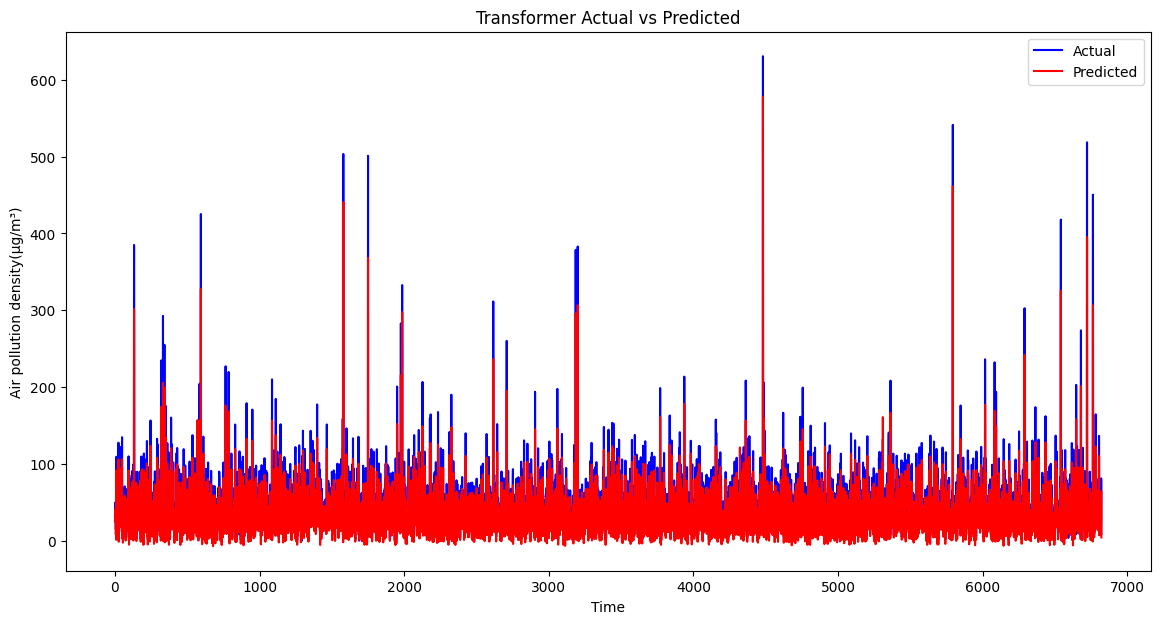

RMSE of MLP Model : 10.7362
R-squared of MLP Model : 0.9027


In [8]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

data_test = pd.read_csv('test_data.csv')

X_test = data_test.drop(columns=["관측미세먼지"]).values
X_test = data_test.drop(columns=["관측미세먼지", "관측지점", "관측시간"]).apply(pd.to_numeric, errors='coerce').fillna(0).values

y_test = data_test["관측미세먼지"].values
y_test = data_test["관측미세먼지"].apply(pd.to_numeric, errors='coerce').fillna(0).values

X_test, _, y_test, _ = train_test_split(X_test, y_test, train_size=0.1, random_state=42)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

actual_values = y_test.cpu().numpy()
predicted_values_MLP = np.load('Transformer.npy')

def evaluate_model(actual_values, predicted_values):

    # RMSE 계산
    rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))

    # R-squared 계산
    r2 = r2_score(actual_values, predicted_values)

    return rmse, r2

def visualize_model(actual_values, predicted_values, model_name):

    time = np.arange(len(predicted_values))

    plt.figure(figsize=(14, 7))
    plt.plot(time, actual_values, label='Actual', color='blue')
    plt.plot(time, predicted_values, label='Predicted', color='red')
    plt.xlabel('Time')
    plt.ylabel('Air pollution density(μg/m³)')
    plt.title(f'{model_name} Actual vs Predicted')
    plt.legend()
    plt.show()

rmse_MLP, r2_MLP = evaluate_model(actual_values, predicted_values_MLP)
visualize_model(actual_values, predicted_values_MLP, 'Transformer')
print(f'RMSE of MLP Model : {rmse_MLP:.4f}')
print(f'R-squared of MLP Model : {r2_MLP:.4f}')